## **Regresión logística**

En este notebook, profundizaremos en un modelo esencial dentro de los problemas de ***clasificación*** : la regresión logística.

La regresión logística es un modelo lineal que se utiliza para clasificación binaria. *No confundirse por su nombre, se trata de un modelo de clasificación, a diferencia de la regresión lineal que vimos en la práctica anterior.*

Estos modelos se emplean mucho para test de enfermedades, filtros de correo spam, test de embarazo, etc. Es un método que aproxima los puntos por una función logística/sigmoide.

Clasifica separando por una linea. Con ese umbral, determina si una instancia es 0 o 1 -es decir, si pertenece a una categoría o a la otra-.

### **`Función sigmoide`**

Es una función que toma valores continuos y devuelve un valor entre 0 y 1

<img src="../_src/assets/sigmoide.jpg"
style = "width:900px; height:300px">

Tiene dos parámetros, w0 y w1. Su rol es parecido al de la pendiente y ordenada al origen en regresión lineal.

w1 = controla la inclinación de la curva en la zona de cambio
w0 = mueve la curva hacia la derecha o la izquierda, según su valor

Lo que hace la regresión logística es encontrar el w0 y w1 que mejor aproximen los puntos pertenecientes a cada clase (esto en el caso de una sola dimensión).

En síntesis, la regresión lineal es el modelo que trata de encontrar la mejor recta que pasa por nuestros puntos. Mientras que la regresión logística trata de encontrar la mejor recta que separa nuestros puntos.

Suele usarse mucho en problemas que necesiten estimar la probabilidad de ocurrencia de algo, ya que cumple con una característica muy importante de una función de probabilidad. ¿Se acuerdan cuál es?

La ecuación general usada para la regresión logística es la siguiente:

$y= \dfrac{e^{(\beta_0 + \beta_1x_1+ \dots+ \beta_p x_p)}}{1 +e^{(\beta_0 + \beta_1x_1+ \dots + \beta_p x_p)}} $

y si estamos trabajando en una dimensión se aproxima de la siguiente forma:

$y= \dfrac{1}{1 +e^{-(\beta_0 + \beta_1x_1)}} $

Pero está función no es lineal. ¿Cómo hacemos entonces para calcular está regresión? Utilizamos una regresión lineal sobre la función de probabilidad logit:

$g(x)=\ln\dfrac{p(x)}{1-p(x)}= \beta_0 + \beta_1 x_1$

## Implementación con un atributo

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

from sklearn.datasets import make_blobs # Importamos el módulo para crear un dataset sintético

In [3]:
# Creamos una función sigmoide
def sigmoid_function(x,w0, w1):

    z = w0 + w1*x # Notar que es una funcion lineal
    y = 1/(1 + np.exp(-z))   # Notar que es una composición
    return y

In [104]:
# Creamos nuestro dataset sintético con la función make_blobs.
# Este dataset lo haremos con un atributo y dos clases
X, y = make_blobs(n_samples=1000, centers=2, n_features=1,
                  random_state=1, cluster_std= 1.5)

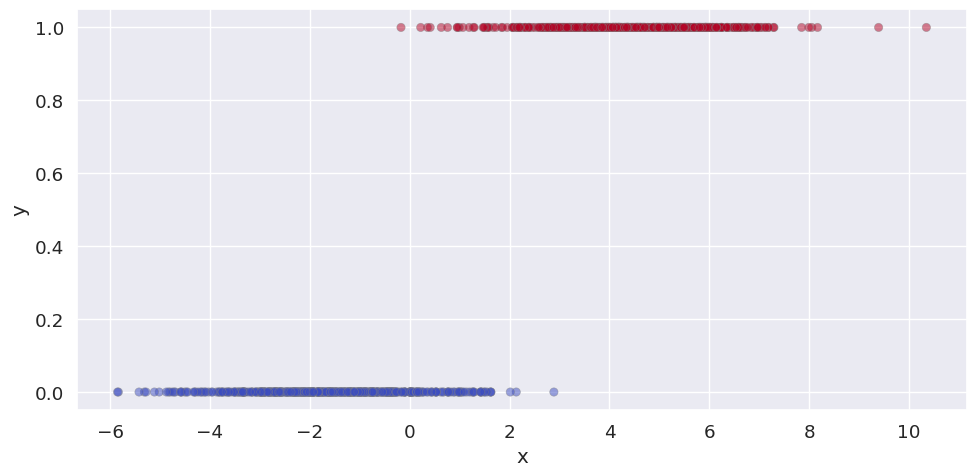

In [105]:
# Graficamos los puntos de nuestro dataset sintético
plt.figure(figsize = (10,5))
plt.scatter(X, y, c = y, alpha = 0.5, lw = 0.5, edgecolor = 'grey', cmap =cm.coolwarm)
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.show()

In [101]:
# Importamos la clase que contiene el algoritmo de regresíon logística

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split


# division de los datos
X_train, X_test, y_train, y_test = train_test_split(X , y ,test_size = 0.30, random_state=42)

# Instanciamos el modelo y lo entrenamos
clf = LogisticRegression()

clf.fit(X_train, y_train)

LogisticRegression()

In [102]:
# Importamos una métrica utilizada para evaluar modelos de clasificación.
# Ya ahondaremos con mayor especificidad en las métricas de clasificación en la clase 3

from sklearn.metrics import accuracy_score

# Predecimos
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

# Evaluamos

print('El score del modelo es:', accuracy_score(y_test, y_pred_test))
print('El score del modelo es:', accuracy_score(y_train, y_pred_train))

El score del modelo es: 0.82
El score del modelo es: 0.8228571428571428


## Matriz de confusion

- Verdadero Positivo (TP): Se encuentra en la celda en la esquina inferior derecha de la matriz, que es el elemento (1, 1). Representa los casos en los que el modelo predijo correctamente ejemplos positivos.

- Verdadero Negativo (TN): Se encuentra en la celda en la esquina superior izquierda de la matriz, que es el elemento (0, 0). Representa los casos en los que el modelo predijo correctamente ejemplos negativos.

- Falso Positivo (FP): Se encuentra en la celda en la esquina superior derecha de la matriz, que es el elemento (0, 1). Representa los casos en los que el modelo predijo incorrectamente ejemplos negativos como positivos.

- Falso Negativo (FN): Se encuentra en la celda en la esquina inferior izquierda de la matriz, que es el elemento (1, 0). Representa los casos en los que el modelo predijo incorrectamente ejemplos positivos como negativos.

El score del modelo es: 0.8633540372670807
El score del modelo es: 0.8254847645429363


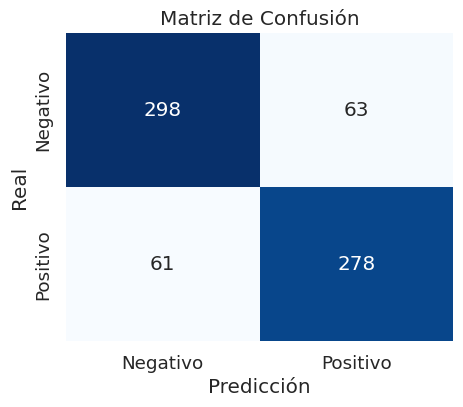

In [103]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def specifity_score(y_train, y_pred_train):
  confusion = confusion_matrix(y_train, y_pred_train)
  return  confusion[0, 0] / (confusion[0, 0] + confusion[0, 1])

def sensity_score(y_train, y_pred_train):
  confusion = confusion_matrix(y_train, y_pred_train)
  return  confusion[1, 1] / (confusion[1, 0] + confusion[1, 1])


print('El score del modelo es:', sensity_score(y_test, y_pred_test))

print('El score del modelo es:', specifity_score(y_train, y_pred_train))


confusion = confusion_matrix(y_train, y_pred_train)

plt.figure(figsize=(5, 4))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=["Negativo","Positivo"], yticklabels=["Negativo","Positivo"])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

In [92]:

confusion = confusion_matrix(y_train, y_pred_train)


In [93]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.56      0.66      0.60       361
           1       0.55      0.45      0.49       339

    accuracy                           0.56       700
   macro avg       0.55      0.55      0.55       700
weighted avg       0.55      0.56      0.55       700



In [10]:
# Observamos los parámetros de la función sigmoide

print(clf.coef_, clf.intercept_)

[[2.44695486]] [-3.22053019]


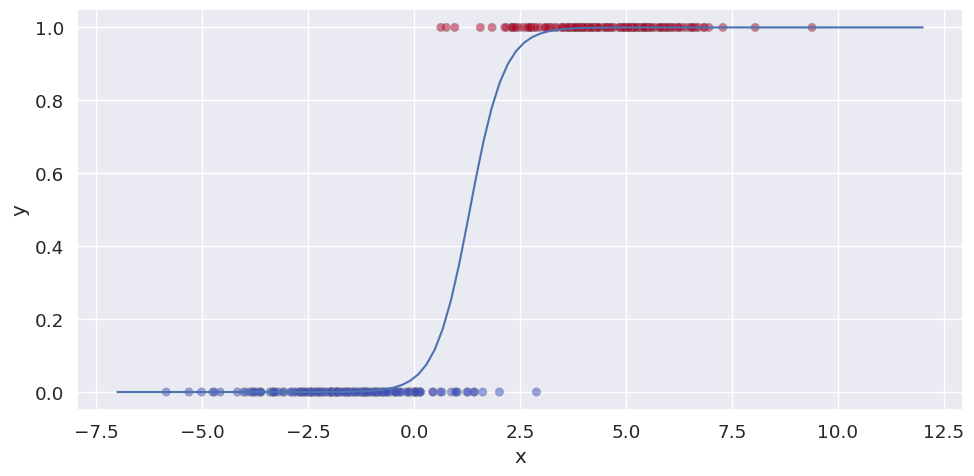

In [11]:
# Graficamos la curva obtenida por la regresión logística

plt.figure(figsize = (10,5))


plt.scatter(X_test, y_test, c = y_test, alpha = 0.5, lw = 0.5, edgecolor = 'grey', cmap =cm.coolwarm)
x_plot = np.linspace(-7,12,100)
plt.plot(x_plot, sigmoid_function(x_plot,clf.intercept_[0], clf.coef_[0][0]))

plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()